In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/lkabuli_waller/workspace/EncodingInformation/imager_experiments/')
from leyla_fns import confidence_bars

In [12]:
psf_name = 'three'
for mean_photon_count in mean_photon_count_list:
    for model_name in ['cnn']:
        data = np.load('cifar_test_accuracy_{}_mean_photon_count_{}_psf_{}_bias_{}_model.npy'.format(mean_photon_count, psf_name, bias, model_name))
        print(np.ptp(data), data)
    

0.05933332443237305 [0.30516666 0.33566666 0.36083335 0.34533334 0.33166668 0.35066667
 0.35749999 0.32499999 0.333      0.36449999]
0.27250000834465027 [0.35333332 0.35583332 0.37533334 0.15116666 0.10283333 0.36050001
 0.36633334 0.36050001 0.35966668 0.36966667]
0.2814999967813492 [0.35416666 0.36950001 0.3845     0.36633334 0.103      0.366
 0.36383334 0.36883333 0.366      0.37799999]
0.27900000661611557 [0.36899999 0.36700001 0.38233334 0.37650001 0.10333333 0.37666667
 0.37283334 0.36766666 0.36633334 0.37216666]
0.023166686296463013 [0.37583333 0.36816666 0.39133334 0.38133332 0.36816666 0.37566668
 0.36816666 0.38466668 0.373      0.37483335]
0.2736666724085808 [0.37816668 0.36950001 0.39133334 0.28983334 0.11766667 0.37683332
 0.37650001 0.38616666 0.38516667 0.382     ]
0.26916666328907013 [0.38016668 0.37583333 0.39633334 0.29133335 0.12716667 0.37650001
 0.37966666 0.38383332 0.38433334 0.38949999]
0.26499998569488525 [0.38416666 0.37516665 0.4005     0.32283333 0.13566667

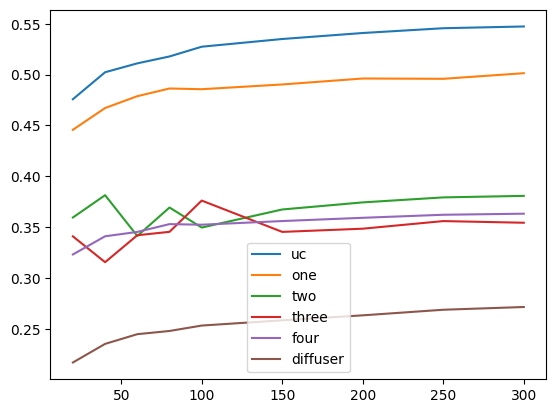

In [13]:
# set seed values for reproducibility
seed_values_full = np.arange(1, 11)

# set photon properties 
bias = 10 # in photons
#mean_photon_count_list = [20, 40, 60, 80, 100, 150, 200, 250, 300]
#mean_photon_count_list = [20, 40, 60, 80, 100]
# set eligible psfs
mean_photon_count_list = [20, 40, 60, 80, 100, 150, 200, 250, 300]
psf_names = ['uc', 'one', 'two', 'three', 'four', 'diffuser']

# %%
for index, psf_name in enumerate(psf_names):
    means_across_photons_fixed_psf = []
    for mean_photon_count in mean_photon_count_list:
        for model_name in ['cnn']:
            data = np.load('cifar_test_accuracy_{}_mean_photon_count_{}_psf_{}_bias_{}_model.npy'.format(mean_photon_count, psf_name, bias, model_name))
            means_across_photons_fixed_psf.append(np.mean(data))
    plt.plot(mean_photon_count_list, means_across_photons_fixed_psf, label=psf_name)
plt.legend()

Text(0.5, 0, 'Mean Photon Count')

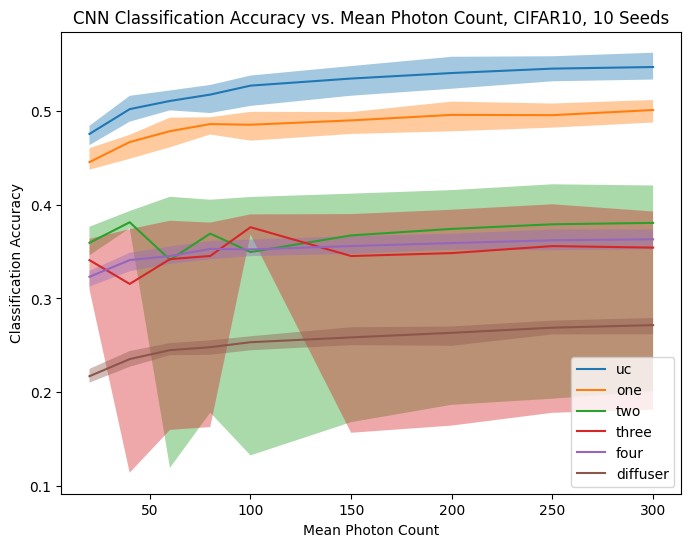

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for psf_name in psf_names:
    classifier_across_photons = [] 
    for photon_count in mean_photon_count_list:
        result = np.load('cifar_test_accuracy_{}_mean_photon_count_{}_psf_{}_bias_{}_model.npy'.format(photon_count, psf_name, bias, 'cnn'))
        classifier_across_photons.append(result)
    error_lo, error_hi, mean = confidence_bars(classifier_across_photons, 9)
    ax.plot(mean_photon_count_list, mean, '-', label='{}'.format(psf_name))
    ax.fill_between(mean_photon_count_list, error_lo, error_hi, alpha=0.4)
plt.legend()
plt.title("CNN Classification Accuracy vs. Mean Photon Count, CIFAR10, 10 Seeds")
plt.ylabel('Classification Accuracy')
plt.xlabel('Mean Photon Count')

photon count is 20
0.03366667032241821 [0.34900001 0.36266667 0.37883332 0.35600001 0.35083333 0.36516666
 0.36050001 0.34516665 0.35749999 0.36899999]
photon count is 40
0.020666658878326416 [0.37966666 0.38       0.39533332 0.38049999 0.37599999 0.37466666
 0.38266668 0.38083333 0.37783334 0.38683334]
photon count is 60
0.3059999942779541 [0.39416668 0.3955     0.41249999 0.16166666 0.1065     0.39266667
 0.39416668 0.38066667 0.39033332 0.38499999]
photon count is 80
0.2893333435058594 [0.39666668 0.40166667 0.40483335 0.11633334 0.39033332 0.39833334
 0.39316666 0.40566668 0.3955     0.39050001]
photon count is 100
0.2878333404660225 [0.40166667 0.40650001 0.40900001 0.17033334 0.12116667 0.39333335
 0.39833334 0.39833334 0.39733332 0.39983332]
photon count is 150
0.28316667675971985 [0.41083333 0.40883332 0.41233334 0.30066666 0.12916666 0.40683332
 0.40066665 0.40566668 0.39866668 0.40000001]
photon count is 200
0.27250000834465027 [0.41150001 0.40666667 0.41333333 0.33199999 0.1

Text(0.5, 0, 'Mean Photon Count')

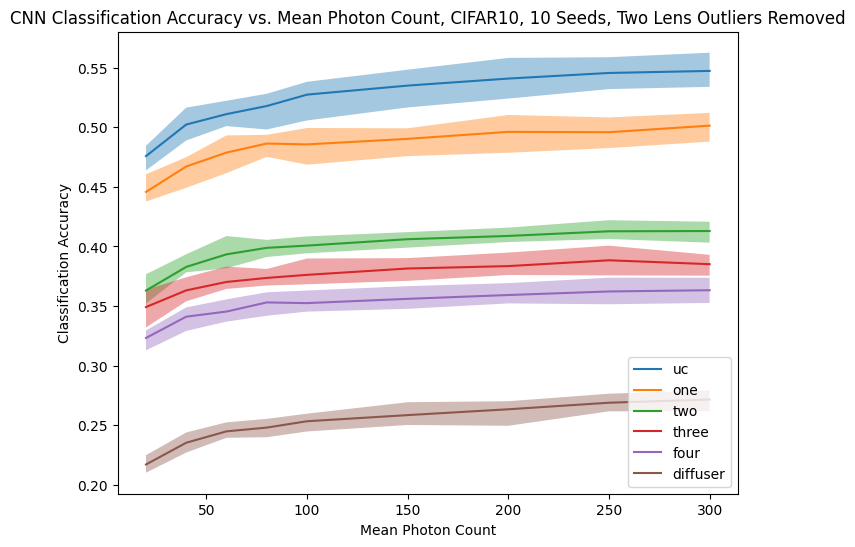

In [15]:
## add in filtering for two psf 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for psf_name in psf_names:
    classifier_across_photons = [] 
    for photon_count in mean_photon_count_list:
        result = np.load('cifar_test_accuracy_{}_mean_photon_count_{}_psf_{}_bias_{}_model.npy'.format(photon_count, psf_name, bias, 'cnn'))
        if psf_name == 'two' or psf_name == 'three':
            print("photon count is {}".format(photon_count))
            print(np.ptp(result), result)
            result[result < np.percentile(result, 20)] = np.percentile(result, 75)
        classifier_across_photons.append(result)
    error_lo, error_hi, mean = confidence_bars(classifier_across_photons, 9)
    ax.plot(mean_photon_count_list, mean, '-', label='{}'.format(psf_name))
    ax.fill_between(mean_photon_count_list, error_lo, error_hi, alpha=0.4)
plt.legend()
plt.title("CNN Classification Accuracy vs. Mean Photon Count, CIFAR10, 10 Seeds, Two Lens Outliers Removed")
plt.ylabel('Classification Accuracy')
plt.xlabel('Mean Photon Count')
